<a href="https://colab.research.google.com/github/mamun216/ML_Models/blob/master/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart disease prediction

# Introduction

This dataset gives a number of variables along with a target condition of having or not having heart disease. It contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.

In [119]:
import numpy as np
import pandas as pd
from statistics import mean 

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

In [120]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


Its clean data and processed data, there is no categorical values, all are numerical data, no missing values, almost ready for machine learning, just need some simple preprocessing and EDA to show the relationship with target variable

# Data Description

age: Age in years

sex: 1 = male, 0 = female

cp: Chest pain type

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results

thalach: Maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment

ca: Number of major vessels (0-3) colored by fluoroscopy

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

target: 1 = Heart disease present, 0 = Heart disease not presen

# Cause of Heart Disease
* Excess weight, especially around the stomach area, increases a woman's risk of developing cardiovascular disease and lack of physical activity makes it worse.
* Diabetes causes damage to blood vessels so diabetes is a major factor in developing cardiovascular disease.
* Unhealthy foods, lack of exercise, lead to heart disease. So can high blood pressure, infections, and birth defects.
* Smoking is one of the biggest causes of cardiovascular disease.
* Just a few cigarettes a day can damage the blood vessels and reduce the amount of oxygen available in our blood.
* But other things might surprise you.

# Data exploration

In [121]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [122]:
heart_data.shape

(212, 14)

In [123]:
 heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [124]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [125]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

https://www.kaggle.com/rajeshjnv/heart-disease-exploration-ml-prediction

# Correlation

In [126]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.110738,-0.048970,0.302295,0.158122,0.105110,-0.127770,-0.406876,0.080177,0.177178,-0.153725,0.257825,0.057012,-0.201492
sex,-0.110738,1.000000,-0.087141,-0.036648,-0.218085,0.079469,-0.029223,-0.030771,0.190460,0.130229,-0.075068,0.140540,0.208014,-0.249428
cp,-0.048970,-0.087141,1.000000,0.133497,-0.075201,0.100696,0.059529,0.296546,-0.359563,-0.133188,0.102054,-0.180292,-0.117986,0.477865
trestbps,0.302295,-0.036648,0.133497,1.000000,0.070579,0.134753,-0.160497,-0.029347,0.013884,0.161726,-0.076801,0.077164,0.028305,-0.114081
chol,0.158122,-0.218085,-0.075201,0.070579,1.000000,-0.034724,-0.149418,0.010816,0.068013,0.095548,-0.059928,0.090058,0.114861,-0.086962
fbs,0.105110,0.079469,0.100696,0.134753,-0.034724,1.000000,-0.092254,-0.056674,0.038995,-0.015585,-0.077953,0.162324,-0.024159,-0.050644
restecg,-0.127770,-0.029223,0.059529,-0.160497,-0.149418,-0.092254,1.000000,0.047961,-0.069414,0.004188,0.028592,-0.103324,-0.049564,0.200817
thalach,-0.406876,-0.030771,0.296546,-0.029347,0.010816,-0.056674,0.047961,1.000000,-0.389385,-0.321755,0.411555,-0.208389,-0.043571,0.417547
exang,0.080177,0.190460,-0.359563,0.013884,0.068013,0.038995,-0.069414,-0.389385,1.000000,0.311790,-0.273425,0.124324,0.179574,-0.482622
oldpeak,0.177178,0.130229,-0.133188,0.161726,0.095548,-0.015585,0.004188,-0.321755,0.311790,1.000000,-0.547698,0.168105,0.173514,-0.398818


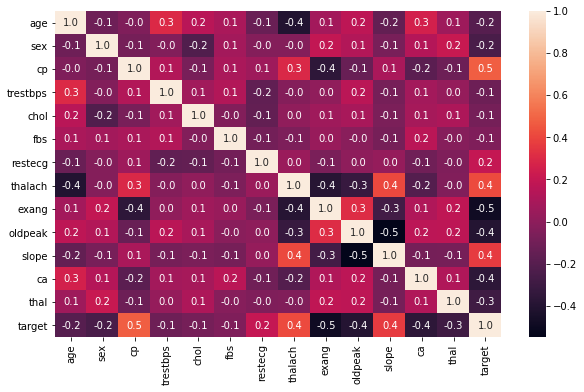

In [127]:
plt.figure(figsize = (10,6))
sns.heatmap(heart_data.corr(), annot = True, fmt = '.1f');

In [128]:
df_corr=heart_data.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list

cp          0.477865
thalach     0.417547
slope       0.370050
restecg     0.200817
trestbps   -0.114081
age        -0.201492
sex        -0.249428
thal       -0.291939
ca         -0.365253
oldpeak    -0.398818
exang      -0.482622
Name: target, dtype: float64

from theabove corelation plot we see that cp(chest pain),thalch and slope are highly corelated with the target.

# Data visualization

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


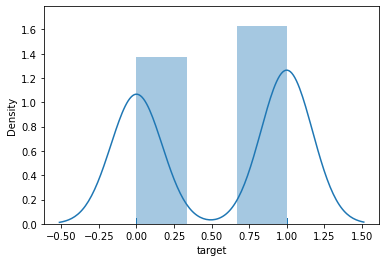

In [129]:
sns.distplot(heart_data['target'],rug=True)
plt.show();

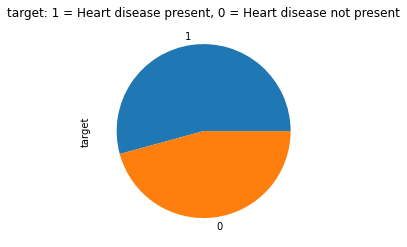

In [130]:
heart_data['target'].value_counts().plot(kind = 'pie')
plt.title("target: 1 = Heart disease present, 0 = Heart disease not present")
plt.show();

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


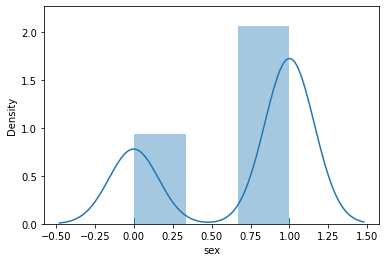

In [131]:
sns.distplot(heart_data['sex'],rug=True);


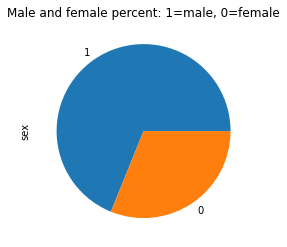

In [132]:
heart_data['sex'].value_counts().plot(kind = 'pie');
plt.title("Male and female percent: 1=male, 0=female");

In [133]:
heart_data.target.value_counts()

1    115
0     97
Name: target, dtype: int64

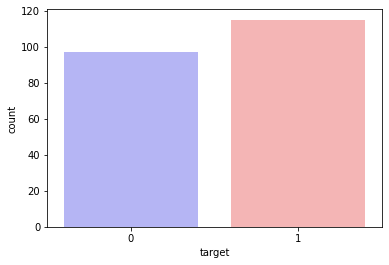

In [134]:
sns.countplot(x="target", data=heart_data, palette="bwr")
plt.show()

In [135]:
countNoDisease = len(heart_data[heart_data.target == 0])
countHaveDisease = len(heart_data[heart_data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.75%
Percentage of Patients Have Heart Disease: 54.25%


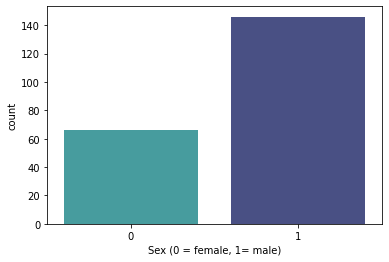

In [136]:
sns.countplot(x='sex', data=heart_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show();

In [137]:
countFemale = len(heart_data[heart_data.sex == 0])
countMale = len(heart_data[heart_data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart_data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart_data.sex))*100)))

Percentage of Female Patients: 31.13%
Percentage of Male Patients: 68.87%


In [138]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.639175,0.814433,0.391753,134.288660,252.855670,0.185567,0.422680,138.412371,0.577320,1.503093,1.206186,1.206186,2.525773
1,52.808696,0.582609,1.356522,130.304348,243.591304,0.147826,0.634783,157.921739,0.121739,0.591304,1.652174,0.426087,2.147826


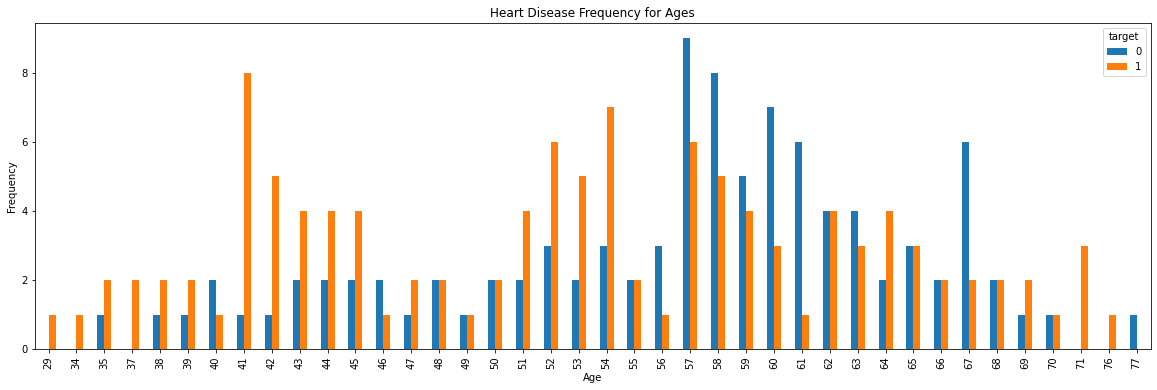

In [139]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show();

Its not easy to say only certain age group is affected by heart disease, it can be any age above 40 but in between 40-65 is high frequency.

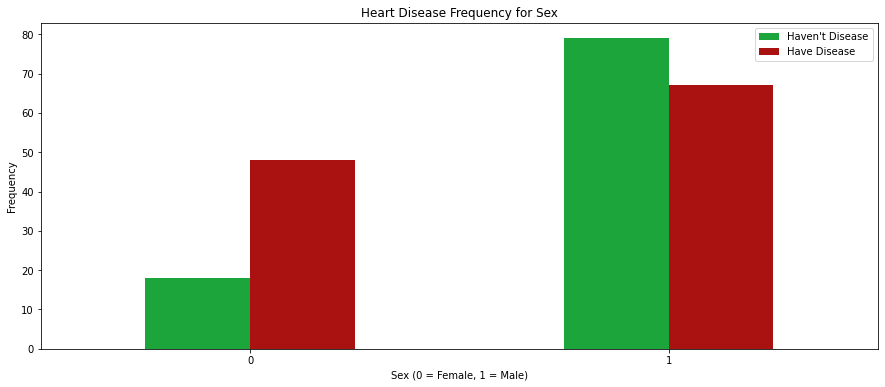

In [140]:
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show();

Compare to men and women, male is more risk for heart disease.

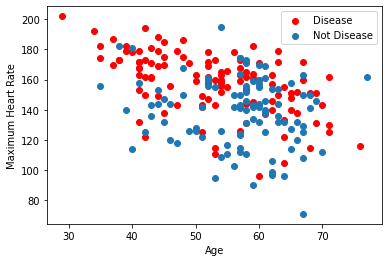

In [141]:
plt.scatter(x=heart_data.age[heart_data.target==1], y=heart_data.thalach[(heart_data.target==1)], c="red")
plt.scatter(x=heart_data.age[heart_data.target==0], y=heart_data.thalach[(heart_data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show();

From the above scatter plot it is easy to say that age about 35-55 ranges people has high risk of heart disease compare to younger age and older age. 

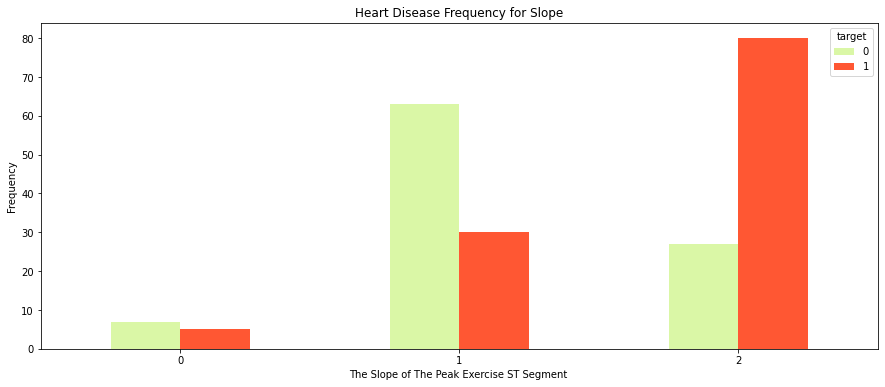

In [142]:
pd.crosstab(heart_data.slope,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show();

Slope is proportionally related with disease, lower slope tends to lower disease and higher slope tends to attack more  heart disease

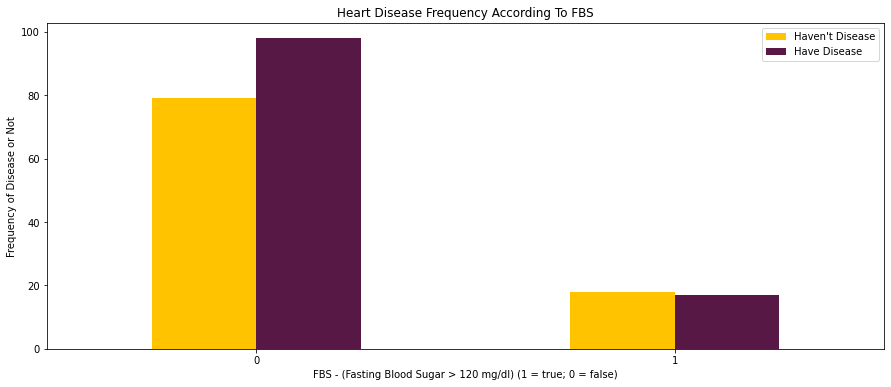

In [143]:
pd.crosstab(heart_data.fbs,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show();

Those have the heart diease they are prone to high blood sugar

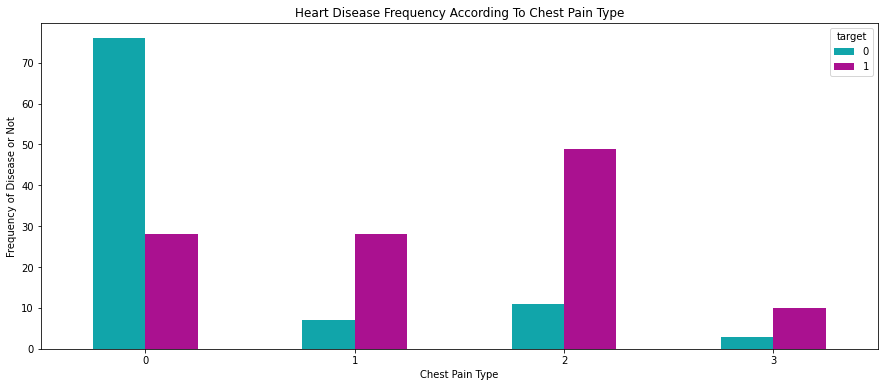

In [144]:
pd.crosstab(heart_data.cp,heart_data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show();

The chest pain level is low for non heart disease patient and high for heart disease patient.

# Create dummy variable to fit into the machine

In [145]:
chest_pain=pd.get_dummies(heart_data['cp'],prefix='cp',drop_first=True)
heart_data=pd.concat([heart_data,chest_pain],axis=1)
heart_data.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(heart_data['slope'],prefix='slope')
th=pd.get_dummies(heart_data['thal'],prefix='thal')
frames=[heart_data,sp,th]
heart_data=pd.concat(frames,axis=1)
heart_data.drop(['slope','thal'],axis=1,inplace=True)

In [196]:
new_heart_data = heart_data.iloc[:91, :-2]

# Seperate input features and output features

In [197]:
X = new_heart_data.drop(['target'], axis = 1)
y = new_heart_data.target.values

# Model building, evaluating and performance testing

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [199]:
X_train.shape, y_train.shape

((72, 18), (72,))

In [200]:
X_test.shape, y_test.shape

((19, 18), (19,))

In [201]:
from sklearn.preprocessing import StandardScaler
scale_X=StandardScaler()
X_train=scale_X.fit_transform(X_train)
X_test=scale_X.transform(X_test)

# Logistic Regression

In [202]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_ac = f1_score(y_test, lr_pred)
print("F1 score", lr_ac)

F1 score 0.6363636363636365


# XGBoost classifier

In [203]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500, max_depth=5, random_state=42)
xgb.fit(X_train,y_train)

# Making predictions on test data
xgb_pred = xgb.predict(X_test)

# Model performance evaluation
xgb_ac= f1_score(y_test, xgb_pred)
print('f1-score : ', xgb_ac)

f1-score :  0.8


# Interpretation with sharp

In [204]:
!pip install shap

In [205]:
import shap

In [206]:
explainer = shap.TreeExplainer(xgb, X_train)
shap_values = explainer.shap_values(X_test)

In [207]:
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.0815818204710518


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.365584,0.012585,0.121161,-1.073809,0.0,-0.523562,-0.302365,0.580737,1.004095,1.871716,-0.096119,-0.630162,0.0,0.0,-0.061638,-0.009545,0.0,0.0
1,-1.766586,0.115945,0.105928,-0.393918,0.0,0.984241,0.213732,0.250835,0.705387,-1.114621,-0.073085,1.907048,0.0,0.0,-0.019438,-0.003476,0.0,0.0
2,0.324438,0.012585,0.121161,1.370326,0.0,0.618881,-0.428761,0.571501,0.366286,1.864737,-0.072053,-0.440700,0.0,0.0,0.033738,0.010809,0.0,0.0
3,-0.144539,0.018044,-0.076534,-1.052888,0.0,0.504477,-0.281543,-1.204773,-1.528549,1.067548,-0.108253,-0.538892,0.0,0.0,0.036185,0.002908,0.0,0.0
4,-1.008502,-0.016489,-0.107708,0.793240,0.0,-0.871417,-0.176955,-0.466796,-1.508860,-2.236148,-0.154796,-0.693913,0.0,0.0,0.024744,0.004867,0.0,0.0


# Plot SHAP force plot for the first row of the test data

In [208]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:], X_test[0,:])

SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting the person’s heart disease.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

# Plot SHAP force plot for all rows of the test data

In [209]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[:,:], X_test[:,:])

As we can see, the features shown in red - person's heart disease chance is high Whereas, we can see that the features shown in blue pushed in less risk for heart disease.

Overall, his final score is -3.22 which is much less than the base value. Thus, he is classified as having a label of 0(False) i.e less risk of heart disease.

# Plot a SHAP summary plot using all the features in the data

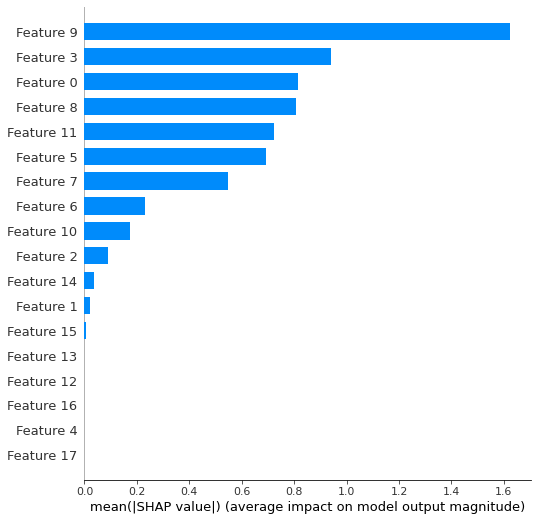

In [210]:
shap.summary_plot(shap_values, X_test, plot_type='bar');

From the above simple bar chart, we observe that Features no.9,3 are the top 2 important features while determining the heart disease.

On the other hand, Features 2,1 are the least important features while determining the heart disease.

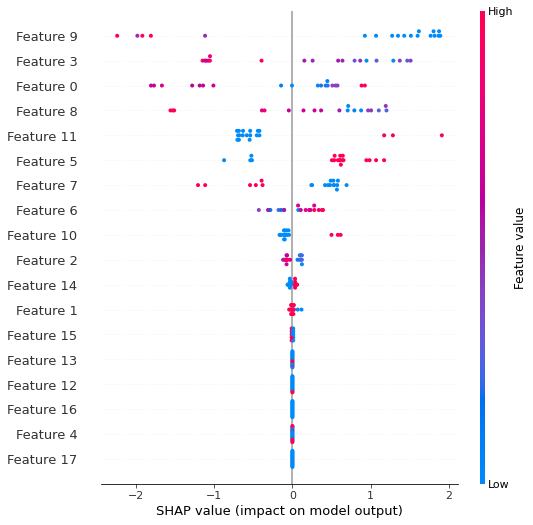

In [211]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

In the above plot, we have provided all the features in X_test to the Summary Plot. We can also provide some specific features instead.

It is interesting to note that the features 9,3 have more total model impact than rest features.



# Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

SHAP dependence plots account for the interaction effects present in the features, and are only defined in regions of the input space supported by data.

The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature can be chosen for coloring to highlight possible interactions.

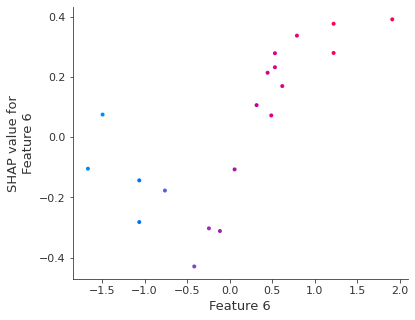

In [212]:
shap.dependence_plot(ind='Feature 6', interaction_index='Feature 6',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

Feature 6 cholestorol is strongly positively corelated with heart disease.

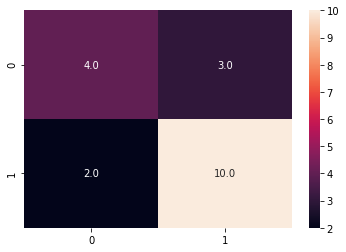

In [213]:
cf = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cf, annot=True, fmt='.1f')

# Test data

In [214]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [215]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [216]:
test_data.shape

(91, 13)

# Create Dummy for fit into the model

In [217]:
chest_pain=pd.get_dummies(test_data['cp'],prefix='cp',drop_first=True)
test_data=pd.concat([test_data,chest_pain],axis=1)
test_data.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(test_data['slope'],prefix='slope')
th=pd.get_dummies(test_data['thal'],prefix='thal')
frames=[test_data,sp,th]
test_data=pd.concat(frames,axis=1)
test_data.drop(['slope','thal'],axis=1,inplace=True)

In [221]:
test_data.shape
new_test_data = test_data.iloc[:, :-1]

In [222]:
new_heart_data.shape

(91, 19)

# Prediction on new test data

In [225]:

predictions = lr.predict(new_test_data)
predictions

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0])

# Saving Prediction File & Sample Submission

In [226]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
#res.to_csv('prediction_results.csv')         
#files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preventions
* Quit smoking.
* Control other health conditions, such as high blood pressure, high cholesterol and diabetes.
* Exercise at least 30 minutes a day on most days of the week.
* Eat a diet that's low in salt and saturated fat.
* Maintain a healthy weight.
* Reduce and manage stress.
* Practice good hygiene.

# Conclusion
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used Plotly, seaborn and matplotlib to do the visualizations. 

Afterwards we started training machine learning models, Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features.
Lastly, we looked at f1_score and computed the models precision.